In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import DADOS_LIMPOS
from src.graficos import SCATTER_ALPHA
from src.graficos import PALETTE

pd.set_option ('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_theme(palette='ocean', style='white')

In [2]:
#arquivo zipado
df = pd.read_parquet(DADOS_LIMPOS)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41,880,129,322,126,8.33,452600,NEAR BAY,5,6.98,2.56,0.15
1,-122.22,37.86,21,7099,1106,2401,1138,8.30,358500,NEAR BAY,5,6.24,2.11,0.16
2,-122.26,37.84,42,2555,665,1206,595,2.08,226700,NEAR BAY,2,4.29,2.03,0.26
3,-122.26,37.85,50,1120,283,697,264,2.12,140000,NEAR BAY,2,4.24,2.64,0.25
4,-122.26,37.84,50,2239,455,990,419,1.99,158700,NEAR BAY,2,5.34,2.36,0.20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  floa

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
count,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00,17564.00
mean,-119.51,35.60,27.28,2510.51,515.38,1386.32,483.98,3.70,189570.80,2.95,5.25,2.93,0.21
std,1.98,2.15,11.32,1593.98,320.85,844.89,295.56,1.54,95971.41,1.01,1.13,0.69,0.05
min,-124.30,32.54,1.00,6.00,2.00,3.00,2.00,0.50,14999.00,1.00,1.71,0.75,0.11
25%,-121.60,33.92,18.00,1464.75,300.00,816.00,287.00,2.55,114300.00,2.00,4.45,2.47,0.18
50%,-118.46,34.24,28.00,2131.00,438.00,1196.00,415.00,3.48,171400.00,3.00,5.21,2.85,0.20
75%,-117.98,37.67,36.00,3124.00,643.00,1738.00,605.00,4.62,243800.00,4.00,5.96,3.31,0.24
max,-114.55,41.95,51.00,11026.00,2205.00,5804.00,1979.00,10.59,500000.00,5.00,10.35,5.39,0.41


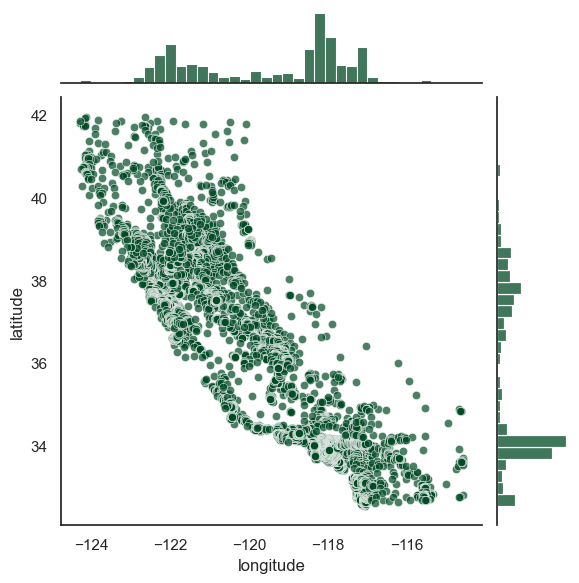

In [5]:
sns.jointplot(data=df, x='longitude', y='latitude', alpha=SCATTER_ALPHA)


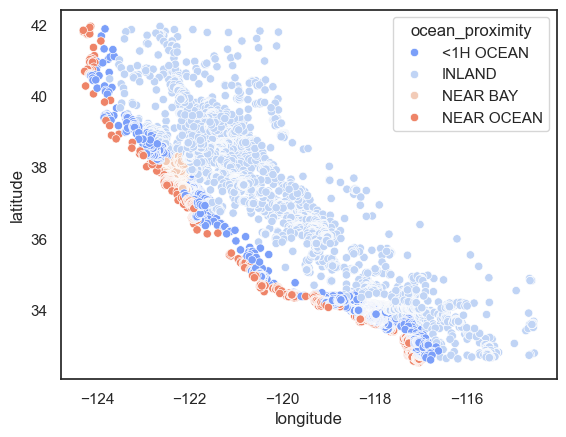

In [6]:
fig, ax= plt.subplots()
sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, hue='ocean_proximity', palette=PALETTE)
plt.show()


Como os pontos do scatterplot podem se bsobrepor, o histograma ajuda na identificação de onde há maior acúmulo de pontos

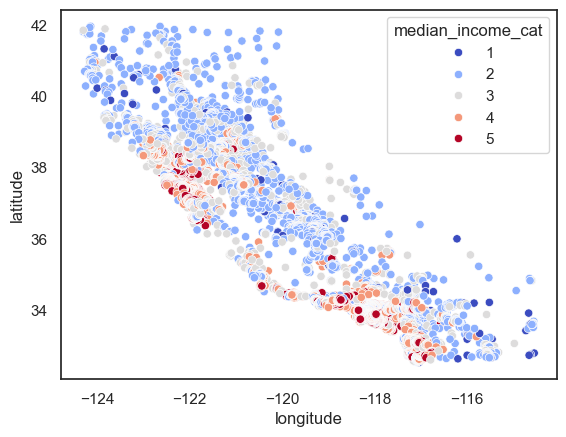

In [7]:
fig, ax= plt.subplots()
sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, hue='median_income_cat', palette=PALETTE)
plt.show()



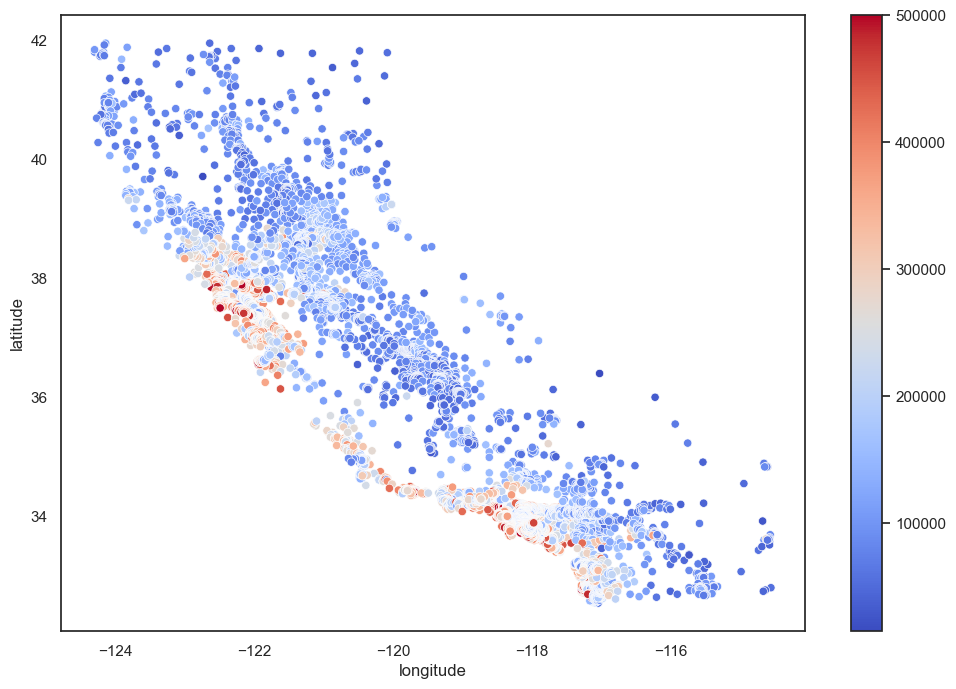

In [9]:
fig, ax= plt.subplots(figsize=(12,8))
norm_median_house_value = plt.Normalize(df['median_house_value'].min(), df['median_house_value'].max())
sm_median_house_value=plt.cm.ScalarMappable (norm= norm_median_house_value, cmap=PALETTE)  #scalarmappable mapeamento para escala de cores
sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, hue='median_house_value',  palette=PALETTE)
ax.get_legend().remove()
fig.colorbar(sm_median_house_value, ax=ax)
plt.show()